In [1]:
import numpy as np

import matplotlib.pyplot as plt

In [2]:
k_prior = 1
lambda_prior = 1

In [3]:
true = 10

In [4]:
import itertools

sizes = [100, 1_000, 10_000]
repeats = [10, 100, 1000]

product = list(itertools.product(sizes, repeats))

In [5]:
from collections import defaultdict

results = defaultdict(list)

for size, repeat in product:
    for _ in range(repeat):
        data = np.random.exponential(scale=1/true, size=size)
        results[(size, repeat)].append((size + 1)/(sum(data) + 1)) # mean of Gamma(a, b) = a / b

In [6]:
def plot_stats(thetas, size, repeat):
    plt.figure(figsize=(5, 5))
    plt.hist(thetas, bins=30, alpha=0.6, label=f'{size=} {repeat=}')
    plt.title('Theta* distribution')
    plt.legend()
    plt.show()

In [7]:
def print_stats(thetas, thetas_true):
    print(f'var={np.var(thetas)} mean={np.mean(thetas)} mse={np.mean((thetas - thetas_true) ** 2)}')

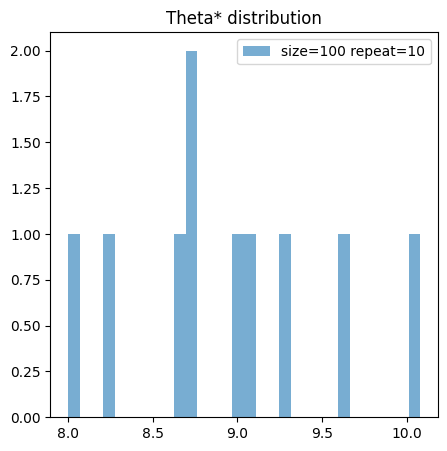

var=0.3441211803218926 mean=8.944750711474144 mse=1.4576722412562209


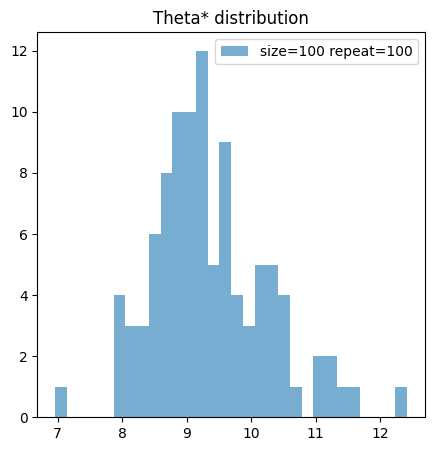

var=0.8089442569503015 mean=9.359779116596785 mse=1.2188270364958942


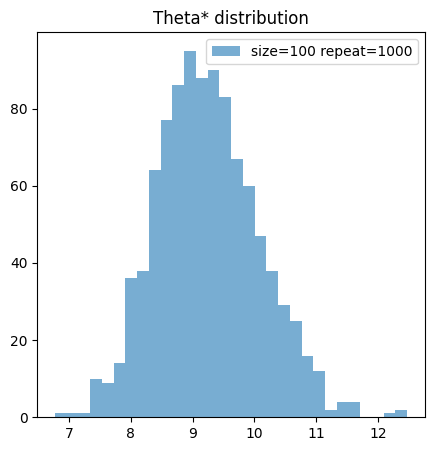

var=0.6822585133576342 mean=9.254309700156153 mse=1.2383125366388403


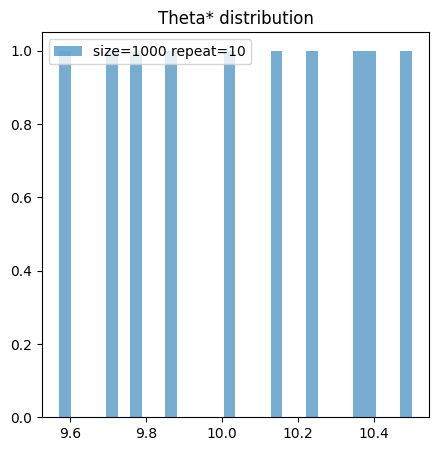

var=0.09285487944137548 mean=10.057620738502305 mse=0.09617502894692656


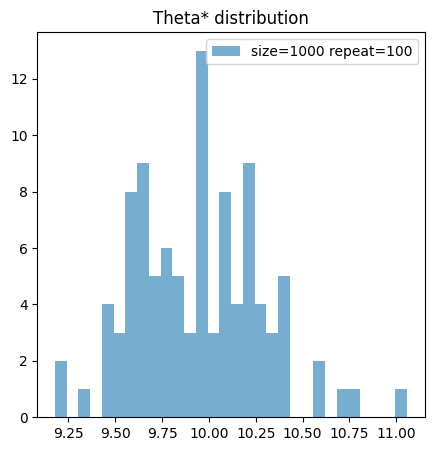

var=0.1156320954374359 mean=9.946177126025626 mse=0.11852899720029715


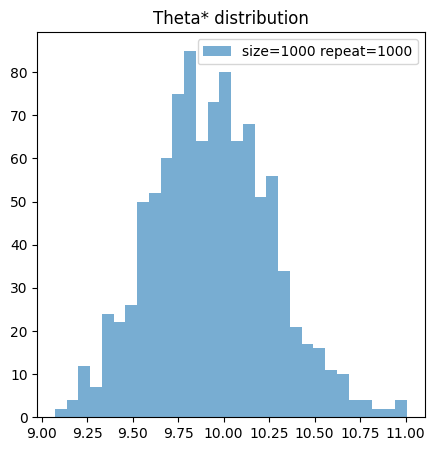

var=0.10806032501492356 mean=9.935040444653533 mse=0.11228006884573438


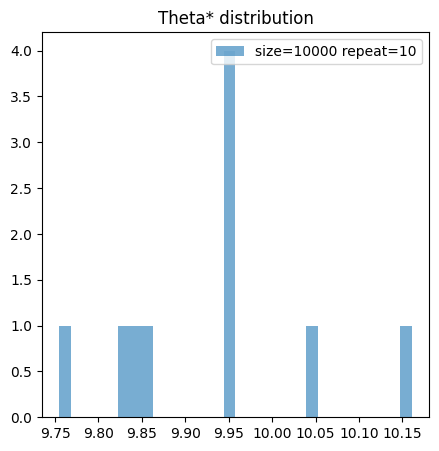

var=0.012022915656228395 mean=9.93187654396319 mse=0.01666372091862741


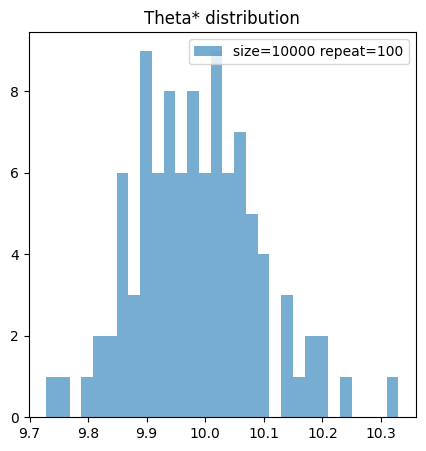

var=0.011244554571010385 mean=9.986015812400264 mse=0.011440112073834979


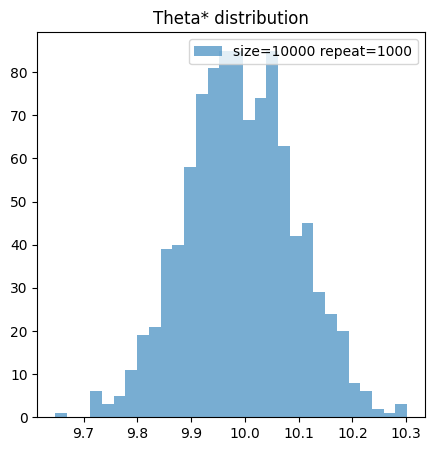

var=0.010206895189502367 mean=9.992023705078681 mse=0.010270516470174202


In [8]:
for size, repeat in product:
    thetas = results[(size, repeat)]
    thetas_true = np.array([true for _ in range(len(thetas))])
    
    diff = np.abs(thetas - thetas_true)
    variance = np.var(thetas)
    mse = np.mean((thetas - thetas_true) ** 2)
    
    plot_stats(thetas, size, repeat)
    print_stats(thetas, thetas_true)